In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import ast
import re
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from matplotlib.colors import LinearSegmentedColormap
from scipy import stats
from matplotlib.gridspec import GridSpec
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.stats.diagnostic import linear_rainbow
from statsmodels.formula.api import ols

In [159]:
train = pd.read_csv("train.csv")
train.head(6)

,url,address,name,online_order,book_table,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),rate
0,https://www.zomato.com/bangalore/kesar-sweet-s...,"1021, 16th Main, 1st Stage, 1st Phase, BTM, Ba...",Kesar Sweet Shop and Fast Food,No,No,213,080 26686062,BTM,Quick Bites,"Chole Bhature, Puri Sabzi, Chaat, Panipuri, Ra...","North Indian, South Indian, Chinese, Street Fo...",500,"[('Rated 4.0', 'RATED\n They have opened a ne...",[],Dine-out,BTM,4.0
1,https://www.zomato.com/bangalore/hyderabadi-bi...,"1, 6/2, Opposite Foodworld Supermarket, 12th C...",Hyderabadi Biryani Hub,Yes,No,45,080 49652950,Sarjapur Road,Quick Bites,NaN,"Biryani, North Indian",600,"[('Rated 4.0', 'RATED\n Tandoori chicken was ...",[],Delivery,Bellandur,3.5
2,https://www.zomato.com/bangalore/mcdonalds-3-j...,"745 / A/ B, 24th Main Road, Shravani Build Tec...",McDonald's,Yes,No,184,080 66000666,JP Nagar,Quick Bites,"Coffee, French Fries, Hash Brown, Cappuccino, ...","Burger, Fast Food",500,"[('Rated 4.0', ""RATED\n Breakfast at Mc Donal...",[],Dine-out,JP Nagar,3.8
3,https://www.zomato.com/bangalore/litti-twist-b...,"No 43, 7th Main Road, NS Palaya, BTM 2nd Stage...",Litti Twist,Yes,No,465,+91 8884270523,BTM,Quick Bites,"Litti, Liti Chokha, Lassi, Tea, Paratha, Thali...","North Indian, Bihari",300,"[('Rated 4.0', ""RATED\n It's a great outlet t...","['Classic Litti', 'Special Litti', 'Aloo Litti...",Delivery,JP Nagar,4.2
4,https://www.zomato.com/bangalore/zaks-mediterr...,"65, 1st Floor, Above Ajwain Dates & Nuts, Cole...",Zaks Mediterranean Cuisine,Yes,No,255,080 64503786\r\r\n080 64504786,Frazer Town,Casual Dining,"Biryani, Shawarma, Kunafa, Pita Bread, Fattous...","Mediterranean, Arabian, Lebanese",700,"[('Rated 1.0', 'RATED\n Today i ordered (mush...","['Fattoush Salad', 'Falafel Roll', 'Shawarma A...",Dine-out,Frazer Town,3.9
5,https://www.zomato.com/bangalore/adda-shanti-n...,"16.8th Cross, H Siddaiha Road, Sudamnagar, Sha...",Adda,No,No,5,+91 9886686948,Shanti Nagar,Quick Bites,NaN,South Indian,300,"[('Rated 4.5', 'RATED\n Nice place to have fo...",[],Dine-out,Lavelle Road,3.3


In [160]:
print(train)

                                                     url  \
0      https://www.zomato.com/bangalore/kesar-sweet-s...   
1      https://www.zomato.com/bangalore/hyderabadi-bi...   
2      https://www.zomato.com/bangalore/mcdonalds-3-j...   
3      https://www.zomato.com/bangalore/litti-twist-b...   
4      https://www.zomato.com/bangalore/zaks-mediterr...   
...                                                  ...   
29160  https://www.zomato.com/bangalore/amaravati-aut...   
29161  https://www.zomato.com/bangalore/ritz-electron...   
29162  https://www.zomato.com/bangalore/smokie-browni...   
29163  https://www.zomato.com/bangalore/kolkata-kathi...   
29164  https://www.zomato.com/bangalore/sri-sai-cafe-...   

                                                 address  \
0      1021, 16th Main, 1st Stage, 1st Phase, BTM, Ba...   
1      1, 6/2, Opposite Foodworld Supermarket, 12th C...   
2      745 / A/ B, 24th Main Road, Shravani Build Tec...   
3      No 43, 7th Main Road, NS Palaya,

In [161]:
train.shape

(29165, 17)

In [162]:
train.dtypes

url                             object
address                         object
name                            object
online_order                    object
book_table                      object
votes                            int64
phone                           object
location                        object
rest_type                       object
dish_liked                      object
cuisines                        object
approx_cost(for two people)     object
reviews_list                    object
menu_item                       object
listed_in(type)                 object
listed_in(city)                 object
rate                           float64
dtype: object

**CHANGING DATA TYPES**

In [163]:
train['approx_cost(for two people)'] = (train['approx_cost(for two people)'].astype(str)
    .str.replace(',', '', regex=False)
    .astype(float)
)

In [164]:
train['votes'] = train['votes'].astype(float)

In [165]:
train.describe()

,votes,approx_cost(for two people),rate
count,29165.000000,28995.000000,29165.000000
mean,353.131459,605.988481,3.702781
std,885.889731,465.814899,0.439526
min,0.000000,40.000000,1.800000
25%,21.000000,300.000000,3.400000
50%,74.000000,500.000000,3.700000
75%,280.000000,750.000000,4.000000
max,16832.000000,6000.000000,4.900000


## **EDA**

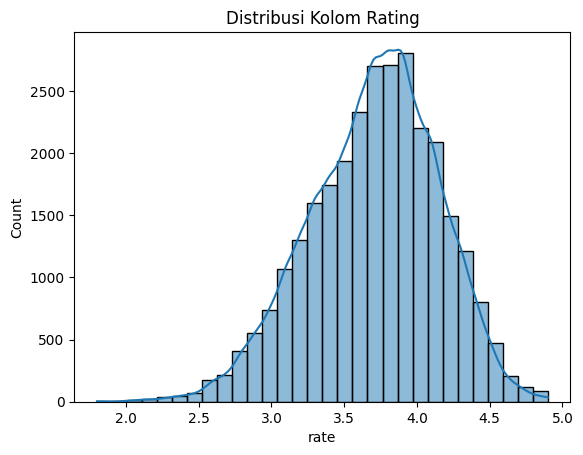

In [166]:
sns.histplot(train['rate'],bins=30,kde=True)
plt.title("Distribusi Kolom Rating")
plt.show()

karena y normal maka semua bisa di transformasi

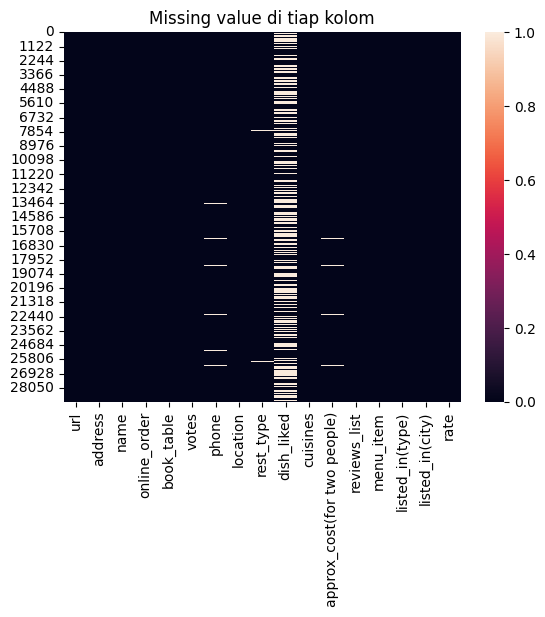

In [167]:
sns.heatmap(train.isnull())
plt.title("Missing value di tiap kolom")
plt.show()

dish_liked dihapus

In [168]:
numerical_cols = train.select_dtypes(include='number').columns

In [169]:
train['approx_cost(for two people)'].astype(float)

0        500.0
1        600.0
2        500.0
3        300.0
4        700.0
         ...  
29160    600.0
29161    800.0
29162    600.0
29163    150.0
29164    200.0
Name: approx_cost(for two people), Length: 29165, dtype: float64

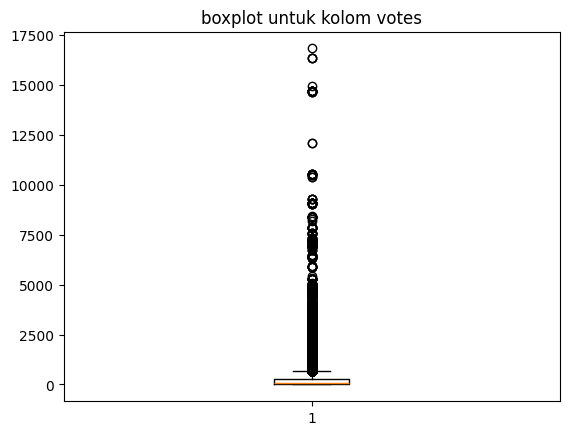

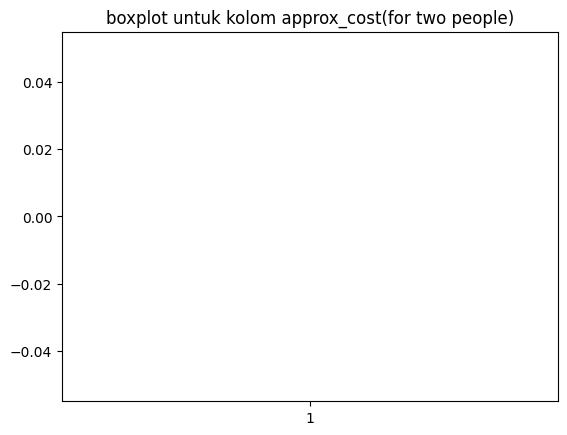

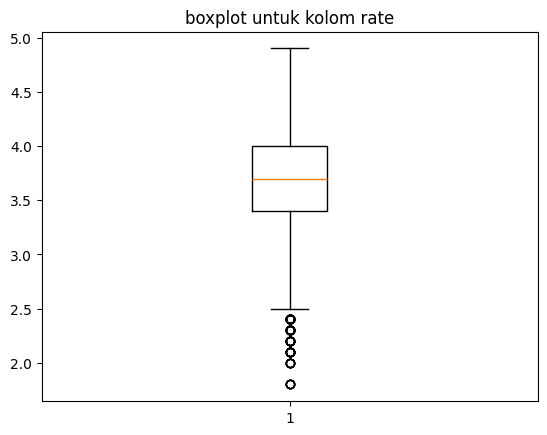

In [170]:
for col in numerical_cols:
    plt.boxplot(train[col])
    plt.title(f"boxplot untuk kolom {col}")
    plt.show()

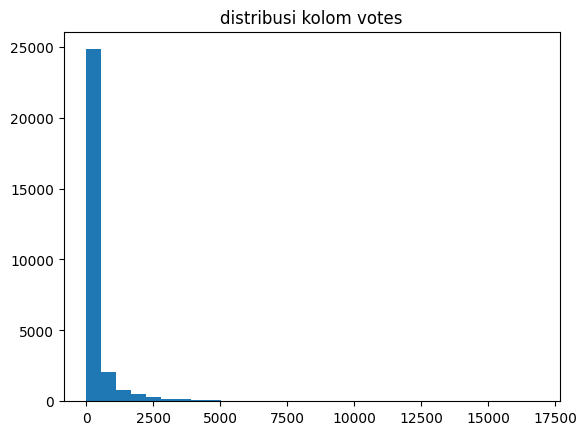

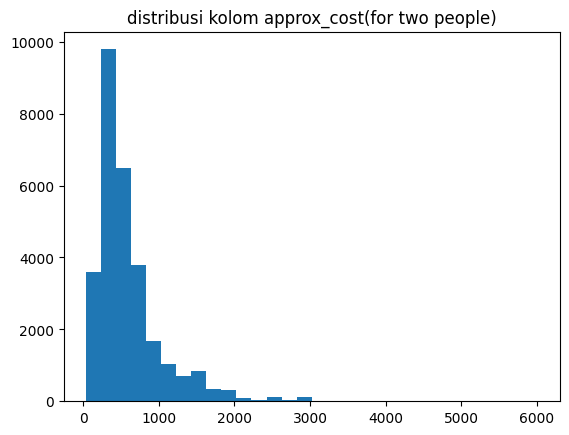

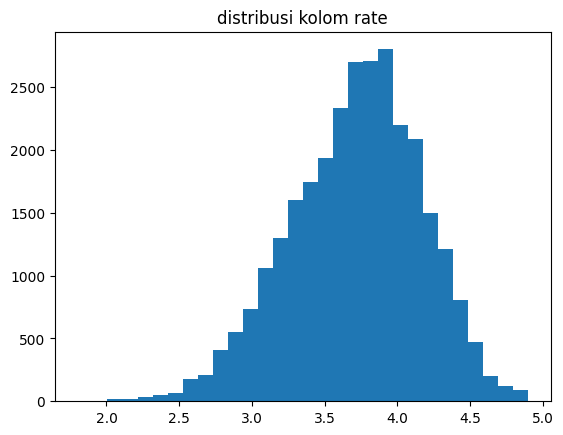

In [171]:
for col in numerical_cols:
    plt.hist(train[col],bins=30)
    plt.title(f"distribusi kolom {col}")
    plt.show()

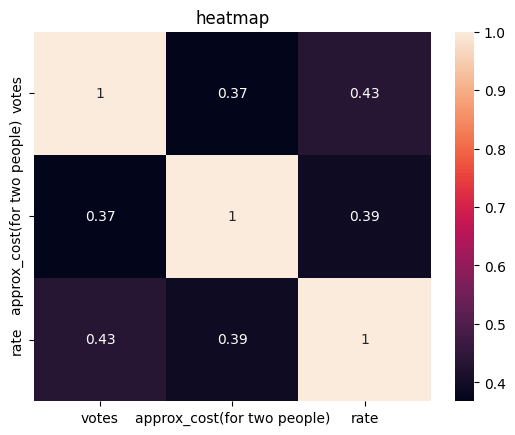

In [172]:
corr = train[numerical_cols].corr()

sns.heatmap(corr,annot=True)
plt.title("heatmap")
plt.show()

<Figure size 600x400 with 0 Axes>

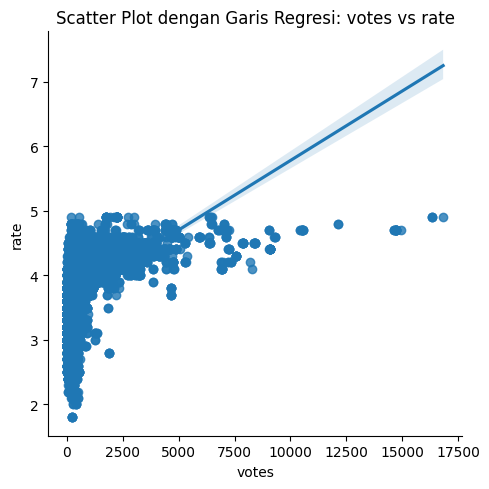

<Figure size 600x400 with 0 Axes>

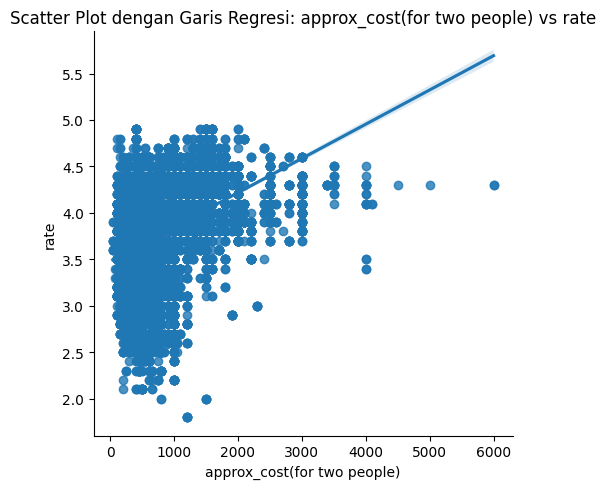

<Figure size 600x400 with 0 Axes>

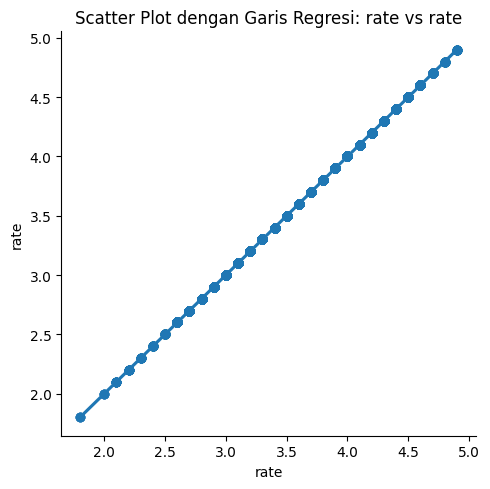

In [173]:
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.lmplot(x=col, y='rate', data=train)
    plt.title(f"Scatter Plot dengan Garis Regresi: {col} vs rate")
    plt.xlabel(col)
    plt.ylabel('rate')
    plt.tight_layout()
    plt.show()

## **PREPROCESSING**

In [174]:
#drop kolom yang ga penting
train=train.drop(columns=['url','address','name'])

In [175]:
train = train.drop(columns='phone')

In [176]:
import ast
import re
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_review_ratings(df, reviews_col='reviews_list', rating_col='rate'):
    def extract_ratings_from_reviews(reviews_list_str):
        try:
            if isinstance(reviews_list_str, str):
                reviews_list = ast.literal_eval(reviews_list_str)
            else:
                reviews_list = reviews_list_str
            
            ratings = []
            for review in reviews_list:
                if isinstance(review, tuple) and len(review) >= 1:
                    match = re.search(r'Rated\s+(\d+(\.\d+)?)', review[0])
                    if match:
                        ratings.append(float(match.group(1)))
            return np.mean(ratings) if ratings else np.nan
        except:
            return np.nan

    df = df.copy()
    df['avg_review_rating'] = df[reviews_col].apply(extract_ratings_from_reviews)

    # Korelasi
    corr, pval = stats.pearsonr(df['avg_review_rating'].dropna(), df.loc[df['avg_review_rating'].notna(), rating_col])
    print(f"Korelasi Pearson: {corr:.4f}, p-value: {pval:.4f}")

    # Visualisasi simpel
    sns.regplot(x='avg_review_rating', y=rating_col, data=df, scatter_kws={'alpha':0.5})
    plt.title('Review Rating vs. Restaurant Rating')
    plt.xlabel('Rata-rata Rating dari Review')
    plt.ylabel('Rating Restoran')
    plt.grid(True, alpha=0.3)
    plt.show()

    return df


Korelasi Pearson: 0.4840, p-value: 0.0000


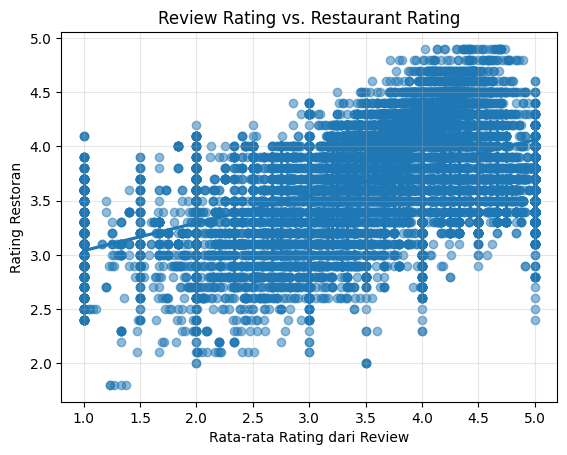

In [177]:
    train = analyze_review_ratings(train)

In [178]:
numerical_cols = train.select_dtypes(include='number').columns

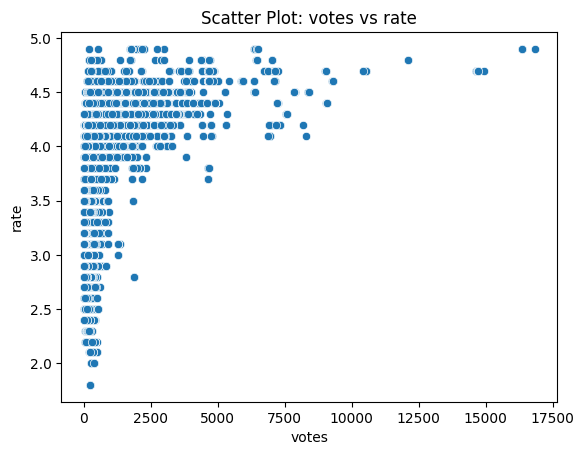

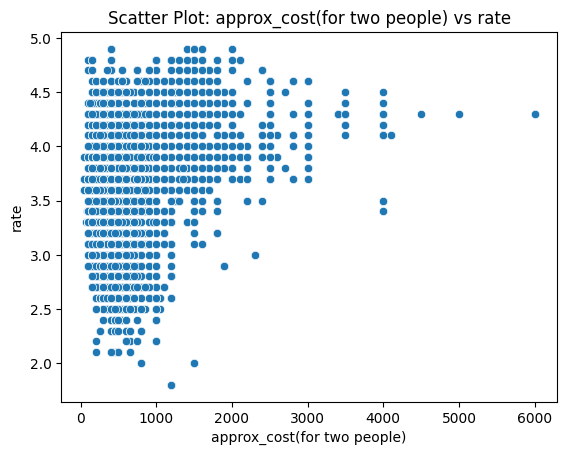

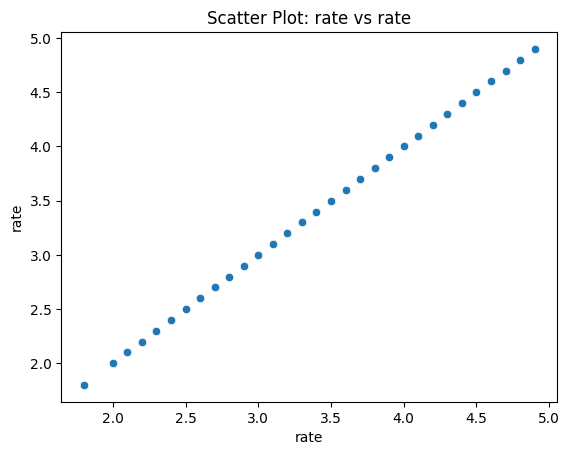

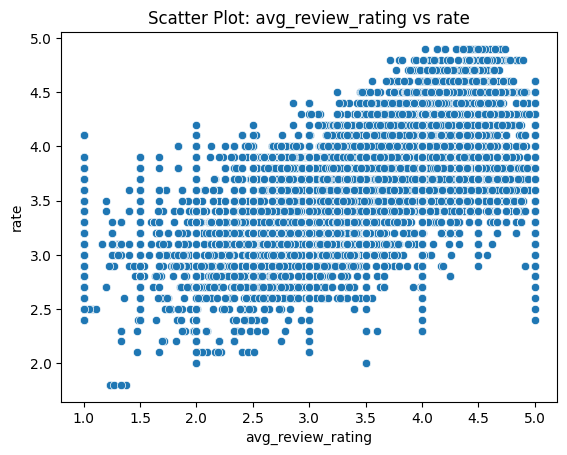

In [179]:
for col in numerical_cols:
    sns.scatterplot(x=col, y='rate', data=train)
    plt.title(f"Scatter Plot: {col} vs rate")
    plt.show()

In [180]:
train['menu_item']= train['menu_item'].replace('[]',np.nan)

In [181]:
train.isnull().sum() * 100 / len(train)

online_order                    0.000000
book_table                      0.000000
votes                           0.000000
location                        0.000000
rest_type                       0.346306
dish_liked                     43.596777
cuisines                        0.030859
approx_cost(for two people)     0.582890
reviews_list                    0.000000
menu_item                      73.673924
listed_in(type)                 0.000000
listed_in(city)                 0.000000
rate                            0.000000
avg_review_rating               2.729299
dtype: float64

In [182]:
train = train.drop(columns=['menu_item'])

In [183]:
import pandas as pd
import numpy as np
from scipy import stats

def categorical_target_correlation(df, cat_col, target_col):
    df = df[[cat_col, target_col]].dropna()

    # Kalau kategori terlalu banyak, skip aja
    if df[cat_col].nunique() < 2:
        print(f"❌ Kolom {cat_col} kurang dari 2 kategori.")
        return None
    
    # Buat grup per kategori
    groups = [group[target_col].values for name, group in df.groupby(cat_col)]
    
    try:
        f_val, p_val = stats.f_oneway(*groups)
        print(f"✅ Kolom: {cat_col}")
        print(f"   ANOVA F-statistic: {f_val:.4f}, p-value: {p_val:.4e}")
        return f_val, p_val
    except Exception as e:
        print(f"⚠️  Gagal hitung ANOVA untuk kolom {cat_col}: {e}")
        return None


In [184]:
categorical_target_correlation(train,'dish_liked','rate')

✅ Kolom: dish_liked
   ANOVA F-statistic: 74.5749, p-value: 0.0000e+00


(np.float64(74.5749404748965), np.float64(0.0))

dish liked masi ada korelasi terhadap kolom target

In [185]:
def clean_dish_liked_column(df, dish_col='dish_liked', rating_col='rate'):
    df = df.copy()

    # Ubah NaN jadi list kosong
    df[dish_col] = df[dish_col].fillna('').astype(str)

    # Pecah string berdasarkan koma, hapus spasi ekstra
    df[dish_col] = df[dish_col].apply(lambda x: [d.strip() for d in x.split(',') if d.strip() != ''])

    # Explode biar tiap dish 1 baris
    df_exploded = df.explode(dish_col).dropna(subset=[dish_col, rating_col])

    return df_exploded


In [186]:
train = clean_dish_liked_column(train,'dish_liked','rate')

In [187]:
categorical_target_correlation(train, 'dish_liked', 'rate')

✅ Kolom: dish_liked
   ANOVA F-statistic: 11.5017, p-value: 0.0000e+00


(np.float64(11.501742784382119), np.float64(0.0))

terdapat korelasi sehingga kolom tidak di drop

In [188]:
def clean_dish_liked_column(df, dish_col='cuisines', rating_col='rate'):
    df = df.copy()

    # Ubah NaN jadi list kosong
    df[dish_col] = df[dish_col].fillna('').astype(str)

    # Pecah string berdasarkan koma, hapus spasi ekstra
    df[dish_col] = df[dish_col].apply(lambda x: [d.strip() for d in x.split(',') if d.strip() != ''])

    # Explode biar tiap dish 1 baris
    df_exploded = df.explode(dish_col).dropna(subset=[dish_col, rating_col])

    return df_exploded


In [189]:
clean_dish_liked_column(train, 'cuisines', 'rate')

,online_order,book_table,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city),rate,avg_review_rating
0,No,No,213.0,BTM,Quick Bites,Chole Bhature,North Indian,500.0,"[('Rated 4.0', 'RATED\n They have opened a ne...",Dine-out,BTM,4.0,4.500000
0,No,No,213.0,BTM,Quick Bites,Chole Bhature,South Indian,500.0,"[('Rated 4.0', 'RATED\n They have opened a ne...",Dine-out,BTM,4.0,4.500000
0,No,No,213.0,BTM,Quick Bites,Chole Bhature,Chinese,500.0,"[('Rated 4.0', 'RATED\n They have opened a ne...",Dine-out,BTM,4.0,4.500000
0,No,No,213.0,BTM,Quick Bites,Chole Bhature,Street Food,500.0,"[('Rated 4.0', 'RATED\n They have opened a ne...",Dine-out,BTM,4.0,4.500000
0,No,No,213.0,BTM,Quick Bites,Chole Bhature,Mithai,500.0,"[('Rated 4.0', 'RATED\n They have opened a ne...",Dine-out,BTM,4.0,4.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29161,No,No,43.0,Electronic City,Casual Dining,Salads,Continental,800.0,"[('Rated 1.0', ""RATED\n I was looking for a r...",Dine-out,Electronic City,3.5,3.298246
29161,No,No,43.0,Electronic City,Casual Dining,Gulab Jamun,North Indian,800.0,"[('Rated 1.0', ""RATED\n I was looking for a r...",Dine-out,Electronic City,3.5,3.298246
29161,No,No,43.0,Electronic City,Casual Dining,Gulab Jamun,Chinese,800.0,"[('Rated 1.0', ""RATED\n I was looking for a r...",Dine-out,Electronic City,3.5,3.298246
29161,No,No,43.0,Electronic City,Casual Dining,Gulab Jamun,Thai,800.0,"[('Rated 1.0', ""RATED\n I was looking for a r...",Dine-out,Electronic City,3.5,3.298246


In [190]:
categorical_target_correlation(train, 'cuisines', 'rate')

✅ Kolom: cuisines
   ANOVA F-statistic: 70.2090, p-value: 0.0000e+00


(np.float64(70.20902115495181), np.float64(0.0))

In [191]:
categorical_target_correlation(train,'listed_in(city)','rate')

✅ Kolom: listed_in(city)
   ANOVA F-statistic: 138.2189, p-value: 0.0000e+00


(np.float64(138.21892068176788), np.float64(0.0))

In [192]:
categorical_target_correlation(train,'location','rate')

✅ Kolom: location
   ANOVA F-statistic: 140.5384, p-value: 0.0000e+00


(np.float64(140.53843033021684), np.float64(0.0))

In [193]:
categorical_target_correlation(train,'dish_liked','rate')

✅ Kolom: dish_liked
   ANOVA F-statistic: 11.5017, p-value: 0.0000e+00


(np.float64(11.501742784382119), np.float64(0.0))

terdapat korelasi terhadap kolom target

In [194]:
train.isnull().sum()

online_order                     0
book_table                       0
votes                            0
location                         0
rest_type                      193
dish_liked                       0
cuisines                         0
approx_cost(for two people)    559
reviews_list                     0
listed_in(type)                  0
listed_in(city)                  0
rate                             0
avg_review_rating              760
dtype: int64

In [195]:
from sklearn.experimental import enable_iterative_imputer  # penting: jangan hapus
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

# Benerin parameternya
imputer = IterativeImputer(estimator=RandomForestRegressor(n_estimators=10, random_state=42))

# Imputasi dan ganti datanya
train[numerical_cols] = imputer.fit_transform(train[numerical_cols])


c:\Users\bryant\anaconda3\envs\sccbootcamp\lib\site-packages\sklearn\impute\_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [196]:
train = clean_dish_liked_column(train, 'cuisines', 'rate')

In [197]:
train = train.drop(columns =['reviews_list'])

In [198]:
train.isnull().sum()

online_order                     0
book_table                       0
votes                            0
location                         0
rest_type                      518
dish_liked                       0
cuisines                         0
approx_cost(for two people)      0
listed_in(type)                  0
listed_in(city)                  0
rate                             0
avg_review_rating                0
dtype: int64

In [199]:
categorical_cols = train.select_dtypes(exclude='number').columns

In [200]:
for col in categorical_cols:
    mode = train[col].mode()[0]
    train[col].fillna(mode, inplace=True) # penting: jangan ambil mode dari test


C:\Users\bryant\AppData\Local\Temp\ipykernel_9372\1313949149.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train[col].fillna(mode, inplace=True) # penting: jangan ambil mode dari test


In [201]:
train.duplicated().sum()

np.int64(192)

In [202]:
train.drop_duplicates(inplace=True)

## **AFTER PREPROCESSING VISUALIZATIONS**

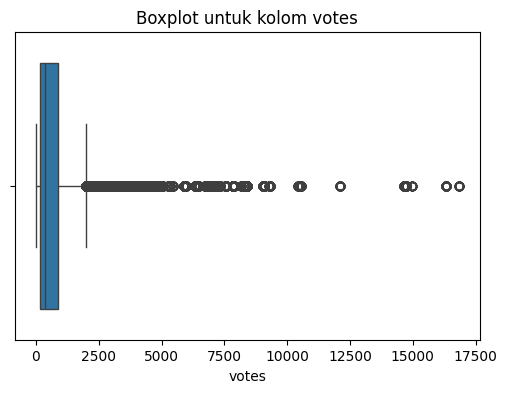

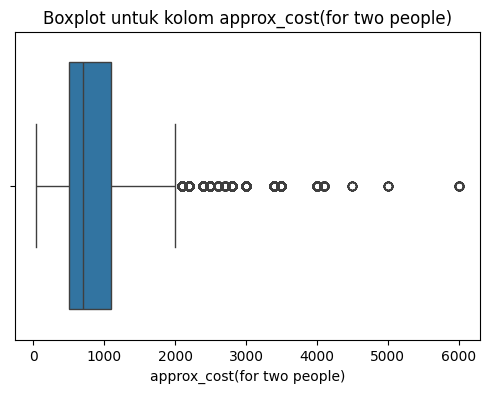

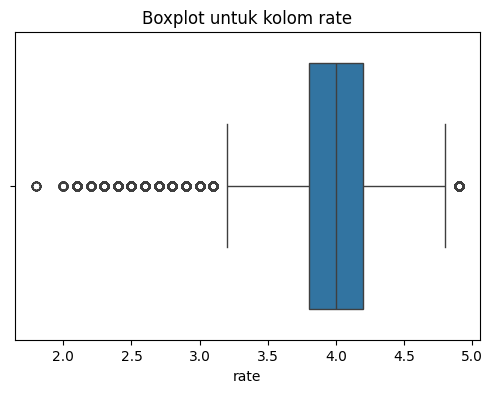

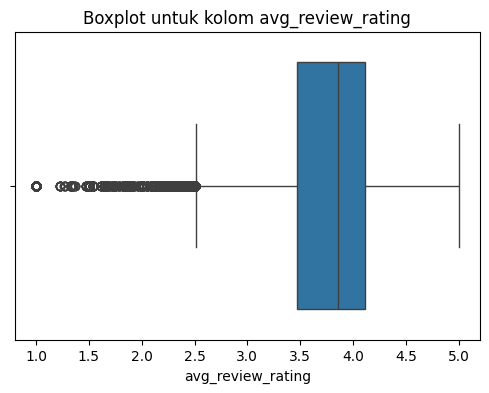

In [203]:
for col in numerical_cols :
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=train[col])
    plt.title(f"Boxplot untuk kolom {col}")
    plt.xlabel(col)
    plt.show()

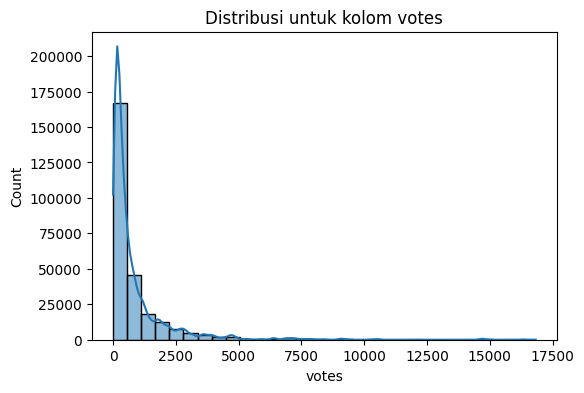

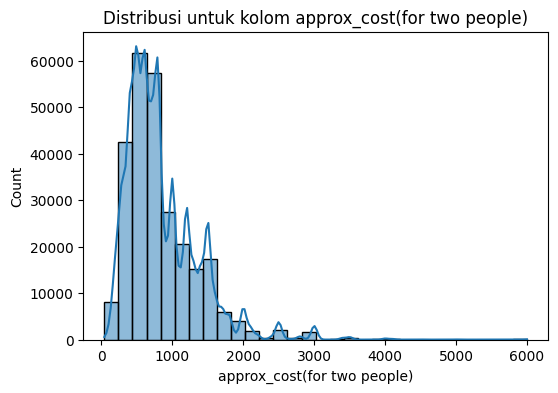

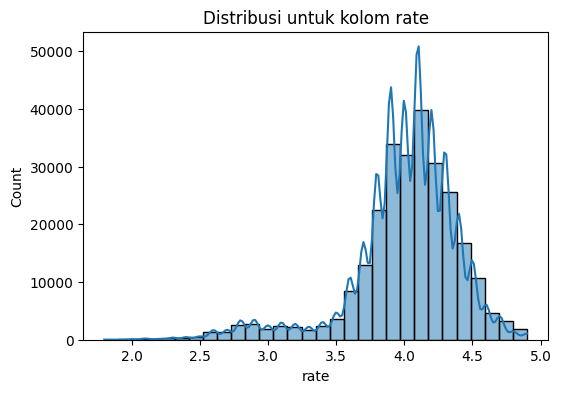

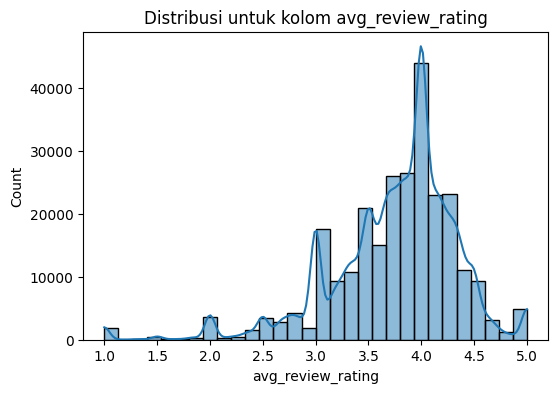

In [204]:
for col in numerical_cols :
    plt.figure(figsize=(6, 4))
    sns.histplot(x=train[col],bins=30, kde=True)
    plt.title(f"Distribusi untuk kolom {col}")
    plt.xlabel(col)
    plt.show()

In [205]:
train['votes'] = np.log1p(train['votes'])


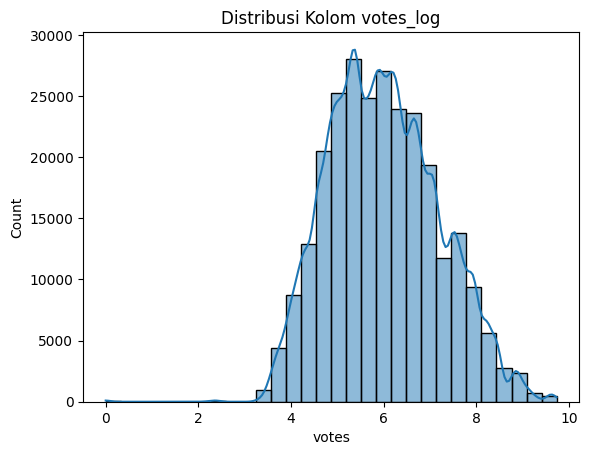

In [206]:
sns.histplot(train['votes'], bins=30, kde=True)
plt.title("Distribusi Kolom votes_log")
plt.show()

In [207]:
from scipy.stats import boxcox

train['approx_cost(for two people)'] = train['approx_cost(for two people)'].replace(',', '', regex=True).astype(float)
train['approx_cost(for two people)'], cost_lambda = boxcox(train['approx_cost(for two people)'] + 1)  # +1 buat hindari 0


In [208]:
from scipy.special import inv_boxcox

train['approx_cost(for two people)'] = inv_boxcox(train['approx_cost(for two people)'], cost_lambda) - 1


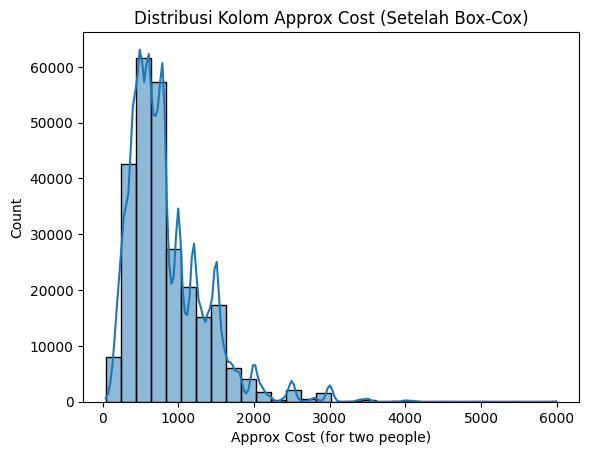

In [209]:
sns.histplot(train['approx_cost(for two people)'], bins=30, kde=True)
plt.title("Distribusi Kolom Approx Cost (Setelah Box-Cox)")
plt.xlabel("Approx Cost (for two people)")
plt.show()

In [210]:
train[numerical_cols] = train[numerical_cols].astype('float32')

## **SPLITTING THE DATASET**

In [211]:
X = train.drop(columns='rate')
y = train['rate']

In [212]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Shape of X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}, y_test: {y_test.shape}")

Shape of X_train: (213290, 11), y_train: (213290,)
Shape of X_test: (53323, 11), y_test: (53323,)


In [213]:
from sklearn.model_selection import KFold
import numpy as np

def target_encode_cv(X_train, X_test, cat_col, y_train, n_splits=5):
    X_train_encoded = X_train.copy()
    X_test_encoded = X_test.copy()

    global_mean = y_train.mean()
    oof_encoded = np.zeros(len(X_train))

    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

    for train_idx, val_idx in kf.split(X_train):
        X_tr, y_tr = X_train.iloc[train_idx], y_train.iloc[train_idx]
        X_val = X_train.iloc[val_idx]

        means = y_tr.groupby(X_tr[cat_col]).mean()
        oof_encoded[val_idx] = X_val[cat_col].map(means).fillna(global_mean)

    X_train_encoded[cat_col] = oof_encoded
    # Test pakai mean dari full train
    test_means = y_train.groupby(X_train[cat_col]).mean()
    X_test_encoded[cat_col] = X_test[cat_col].map(test_means).fillna(global_mean)

    return X_train_encoded[cat_col], X_test_encoded[cat_col]


In [214]:
X_train['location'], X_test['location'] = target_encode_cv(X_train, X_test, 'location', y_train)
X_train['cuisines'], X_test['cuisines'] = target_encode_cv(X_train, X_test, 'cuisines', y_train)
X_train['listed_in(city)'], X_test['listed_in(city)'] = target_encode_cv(X_train, X_test, 'listed_in(city)', y_train)

In [215]:
X_train['dish_liked'], X_test['dish_liked'] = target_encode_cv(X_train, X_test, 'dish_liked', y_train)

In [216]:
X_train['listed_in(type)'], X_test['listed_in(type)'] = target_encode_cv(X_train, X_test, 'listed_in(type)', y_train)
X_train['rest_type'], X_test['rest_type'] = target_encode_cv(X_train, X_test, 'rest_type', y_train)

In [217]:
X_train

,online_order,book_table,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city),avg_review_rating
6396,Yes,No,6.142037,3.884279,4.063276,4.062522,4.066913,500.0,4.088101,3.889638,3.956522
17386,No,Yes,6.212606,4.219859,4.507018,4.248002,4.213770,2100.0,3.984398,4.056386,4.431035
21844,No,Yes,7.620705,4.259599,4.210072,4.251438,4.104424,1200.0,3.931714,4.080743,4.166667
20740,Yes,Yes,6.458338,4.175383,3.916181,3.949704,3.954056,1100.0,3.984398,4.086328,3.923077
21908,Yes,No,6.186209,3.898381,4.118343,3.887884,4.071387,700.0,3.931849,4.053363,4.200000
...,...,...,...,...,...,...,...,...,...,...,...
13093,Yes,No,4.564348,3.959966,4.113682,4.080000,3.833557,650.0,3.932506,4.077657,2.000000
28292,No,Yes,8.318010,4.116072,4.282860,4.136970,3.856408,1200.0,4.206718,4.057099,3.933333
14339,Yes,No,5.652489,4.174675,3.807900,3.997571,3.836998,500.0,3.987225,4.077995,4.000000
16003,Yes,No,4.564348,3.882416,3.913277,4.149242,4.091320,600.0,3.931714,4.058669,4.000000


In [218]:
X_train=pd.get_dummies(X_train,columns=['online_order','book_table'],drop_first=True)
X_test=pd.get_dummies(X_test,columns=['online_order','book_table'],drop_first=True)


## **MODELLING**

In [219]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

lm.fit(X_train,y_train)

LinearRegression()

In [220]:
pred = lm.predict(X_test)

In [221]:
pred

array([3.89430634, 4.8307411 , 3.61530386, ..., 3.98336627, 4.0903446 ,
       3.99783308])

In [222]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)

print(f"RMSE: {rmse:.4f}")
print(f"MSE: {mse:.4f}")

RMSE: 0.2535
MSE: 0.0642


## **TESTING**

In [223]:
test = pd.read_csv("test.csv")

In [224]:
train = pd.read_csv("train.csv")

**PREPROCESSING TEST**

In [225]:
test['approx_cost(for two people)'] = test['approx_cost(for two people)'].str.replace(',', '',regex=False).astype(float)

In [226]:
import ast
import re
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_review_ratings(df, reviews_col='reviews_list', rating_col='rate'):
    def extract_ratings_from_reviews(reviews_list_str):
        try:
            if isinstance(reviews_list_str, str):
                reviews_list = ast.literal_eval(reviews_list_str)
            else:
                reviews_list = reviews_list_str
            
            ratings = []
            for review in reviews_list:
                if isinstance(review, tuple) and len(review) >= 1:
                    match = re.search(r'Rated\s+(\d+(\.\d+)?)', review[0])
                    if match:
                        ratings.append(float(match.group(1)))
            return np.mean(ratings) if ratings else np.nan
        except:
            return np.nan

    df = df.copy()
    df['avg_review_rating'] = df[reviews_col].apply(extract_ratings_from_reviews)
    return df

In [227]:
test = analyze_review_ratings(test)

In [228]:
test['votes'] = test['votes'].astype(float)

In [229]:
test = test.drop(columns=['url','address','name','phone','menu_item'])

In [230]:
numerical_cols_test = test.select_dtypes(include='number').columns

In [231]:
def clean_dish_liked_column(df, dish_col='dish_liked'):
    df = df.copy()

    # Ubah NaN jadi list kosong
    df[dish_col] = df[dish_col].fillna('').astype(str)

    # Pecah string berdasarkan koma, hapus spasi ekstra
    df[dish_col] = df[dish_col].apply(lambda x: [d.strip() for d in x.split(',') if d.strip() != ''])

    # Explode biar tiap dish 1 baris
    df_exploded = df.explode(dish_col).dropna(subset=[dish_col])

    return df_exploded


In [232]:
def clean_cuisines_column(df, dish_col='cuisines'):
    df = df.copy()

    # Ubah NaN jadi list kosong
    df[dish_col] = df[dish_col].fillna('').astype(str)

    # Pecah string berdasarkan koma, hapus spasi ekstra
    df[dish_col] = df[dish_col].apply(lambda x: [d.strip() for d in x.split(',') if d.strip() != ''])

    # Explode biar tiap dish 1 baris
    df_exploded = df.explode(dish_col).dropna(subset=[dish_col])

    return df_exploded


In [233]:
test = clean_dish_liked_column(test,'dish_liked')
test = clean_cuisines_column(test)

In [234]:
from scipy.stats import boxcox
from scipy.special import inv_boxcox

test['approx_cost(for two people)'] = boxcox(test['approx_cost(for two people)'] + 1, lmbda=cost_lambda)

In [235]:
test[numerical_cols_test] = test[numerical_cols_test].astype('float32')

In [236]:
categorical_cols_test = test.select_dtypes(exclude='number').columns

In [237]:
from sklearn.pipeline import Pipeline

numeric_pipeline = Pipeline([
    ('imputer',IterativeImputer()),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

#gabungkan preprocessing
preprocessor = ColumnTransformer([
    ('num',numeric_pipeline, numerical_cols_test),
    ('cat',categorical_pipeline,categorical_cols_test)
])

pipeline = Pipeline([
    ('preprocessor', preprocessor)
    ('feature_selection', SelectKBest(score_func=f_regression, k=10)),
])

<>:20: SyntaxWarning: 'tuple' object is not callable; perhaps you missed a comma?
<>:20: SyntaxWarning: 'tuple' object is not callable; perhaps you missed a comma?
C:\Users\bryant\AppData\Local\Temp\ipykernel_9372\2946960237.py:20: SyntaxWarning: 'tuple' object is not callable; perhaps you missed a comma?
  ('preprocessor', preprocessor)
C:\Users\bryant\AppData\Local\Temp\ipykernel_9372\2946960237.py:20: SyntaxWarning: 'tuple' object is not callable; perhaps you missed a comma?
  ('preprocessor', preprocessor)
C:\Users\bryant\AppData\Local\Temp\ipykernel_9372\2946960237.py:20: SyntaxWarning: 'tuple' object is not callable; perhaps you missed a comma?
  ('preprocessor', preprocessor)


NameError: name 'SelectKBest' is not defined

In [ ]:
test = pipeline.fit_transform(test)

In [ ]:
y_pred_test = lm.predict(test)

c:\Users\bryant\anaconda3\envs\sccbootcamp\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: X has 8218 features, but LinearRegression is expecting 11 features as input.